In [2]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neural_network as mlp

def load_mnist(path, kind='train'):
    #Load MNIST data from `path`

    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)

    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)

    with open(labels_path, 'rb') as lbpath:

        magic, n = struct.unpack('>II', lbpath.read(8))

        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:

        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))

        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)

    return images, labels
imgs, labels = load_mnist("./")  
    

In [28]:
import time

t0 = time.time()
perc = mlp.MLPClassifier(activation='logistic', alpha= 0.0001, hidden_layer_sizes=200, 
                         learning_rate= 'adaptive', max_iter= 200, verbose=True)

perc.fit(imgs, labels)
t1 = time.time()
print("Training time: " + str(abs(t0 - t1)))



testImgs, testLabels = load_mnist("./", "t10k")

print(perc.score(testImgs, testLabels))

Iteration 1, loss = 0.50720075
Iteration 2, loss = 0.27645149
Iteration 3, loss = 0.24295514
Iteration 4, loss = 0.22249844
Iteration 5, loss = 0.21140488
Iteration 6, loss = 0.19740062
Iteration 7, loss = 0.19080450
Iteration 8, loss = 0.19048063
Iteration 9, loss = 0.18324910
Iteration 10, loss = 0.16899873
Iteration 11, loss = 0.16909016
Iteration 12, loss = 0.16742641
Iteration 13, loss = 0.17140866
Iteration 14, loss = 0.16827328
Iteration 15, loss = 0.16271103
Iteration 16, loss = 0.15731637
Iteration 17, loss = 0.15058802
Iteration 18, loss = 0.14772120
Iteration 19, loss = 0.14989534
Iteration 20, loss = 0.14467371
Iteration 21, loss = 0.14093790
Iteration 22, loss = 0.14552106
Iteration 23, loss = 0.14951017
Iteration 24, loss = 0.14770880
Iteration 25, loss = 0.13724909
Iteration 26, loss = 0.13653792
Iteration 27, loss = 0.13285923
Iteration 28, loss = 0.14840520
Iteration 29, loss = 0.13924609
Iteration 30, loss = 0.13335305
Iteration 31, loss = 0.13011326
Iteration 32, los

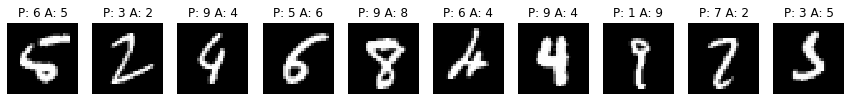

In [32]:
predicted = perc.predict(testImgs)

errors = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
errImg = []
errLbl = []
errCrc = []
i = 0
for image, prediction, actual in zip(testImgs, predicted, testLabels):
    if (prediction != actual):
        errors[actual] += 1
        errImg.append(image)
        errLbl.append(prediction)
        errCrc.append(actual)
        
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 5))
for ax, image, prediction, actual in zip(axes, errImg, errLbl, errCrc):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap='gray', interpolation="nearest")
    ax.set_title(f"P: {prediction} A: {actual}")

In [3]:
from sklearn.model_selection import GridSearchCV

mlpCV = mlp.MLPClassifier()
parameter_space = {
    'verbose': [True],
    'hidden_layer_sizes': [10],
    'activation': ['logistic'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [50, 100, 150],
    'batch_size': [100, 200, 300]
}


best = GridSearchCV(mlpCV, parameter_space, n_jobs=-1, cv=5)
best.fit(imgs, labels)

print('Best parameters found:\n', best.best_params_)

Iteration 1, loss = 1.79881104
Iteration 2, loss = 1.30574311
Iteration 3, loss = 1.05460548
Iteration 4, loss = 0.89946749
Iteration 5, loss = 0.77750381
Iteration 6, loss = 0.69273501
Iteration 7, loss = 0.64176964
Iteration 8, loss = 0.59890768
Iteration 9, loss = 0.57719742
Iteration 10, loss = 0.54993996
Iteration 11, loss = 0.54863130
Iteration 12, loss = 0.52257918
Iteration 13, loss = 0.51625675
Iteration 14, loss = 0.50643306
Iteration 15, loss = 0.49558643
Iteration 16, loss = 0.49698624
Iteration 17, loss = 0.48844613
Iteration 18, loss = 0.48737020
Iteration 19, loss = 0.47727121
Iteration 20, loss = 0.47779745
Iteration 21, loss = 0.46453772
Iteration 22, loss = 0.46240698
Iteration 23, loss = 0.46134431
Iteration 24, loss = 0.46251530
Iteration 25, loss = 0.44717806
Iteration 26, loss = 0.44789823
Iteration 27, loss = 0.45112791
Iteration 28, loss = 0.44675441
Iteration 29, loss = 0.44197399
Iteration 30, loss = 0.44350091
Iteration 31, loss = 0.44387857
Iteration 32, los